In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=256) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('ecfp_ndonor.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [9]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_996.csv')#Put address
efp_996=pd.read_csv('efp_996.csv')
efp_996=np.array(efp_996)
# Charge=input[['Charge_acid']].copy()
Isomer=input[['Isomer']].copy()
# X_996=np.concatenate((efp_996,Charge),axis=1)
X_996=np.concatenate((efp_996,Isomer),axis=1)
print(len(efp_996))
#Isomer_positive=input_positive[['Isomer']].copy()
#X_996=np.concatenate((efp_996,Isomer_positive),axis=1)
#X_785=col_normalize(X_785)
X_996.shape

996


(996, 257)

In [10]:
#assign the Hammett constants to Y
Y_996=input[['Hammett Constant']].copy()
Y_996=np.array(Y_996)

In [11]:
efp_ndonor=pd.read_csv('ecfp_ndonor.csv')
efp_ndonor=np.array(efp_ndonor)
X_ndonor=efp_ndonor
X_ndonor.shape

(10, 257)

In [12]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((996,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((996,1000),dtype=float)
Y_target_train=np.zeros((996,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [13]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [14]:
# list(X_996).index("infinity")

In [15]:
for m in range(0,1000):
    #positive part
    index_996=np.random.choice(996, size=996, replace=1)
    X_train=X_996[index_996]
    Y_train=Y_996[index_996]
    X_test=np.delete(X_train,index_996,axis=0)
    Y_test=np.delete(Y_train,index_996,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_996)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [16]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 3.32720000e-01,  5.77550000e-02,  1.09820000e-01, -4.42670000e-01,
       -5.73360000e-01,  3.61590000e-01,  4.54930000e-01,  2.99980000e-01,
        2.16900000e-01,  5.27690000e-01,  5.63030000e-01,  6.81430667e-01,
        7.32344000e-01,  3.30260000e-01,  3.57320000e-01,  2.58876667e-01,
        2.55390000e-01,  4.62450000e-01,  5.22910000e-01,  1.84980000e-01,
        1.16230000e-01,  3.93780000e-01,  4.18600000e-01,  4.08230000e-01,
        5.05970000e-01,  4.38740000e-01,  4.68380000e-01,  4.58280000e-01,
        5.12840000e-01,  3.13170000e-01,  3.55180000e-01,  4.42640000e-01,
        5.15820000e-01,  5.57900000e-02,  4.01000000e-03,  1.04080000e-01,
        1.04330000e-01, -5.85800000e-02, -1.09710000e-01, -5.34100000e-02,
       -1.15090000e-01, -5.45900000e-02,  1.98680000e-01, -1.19070000e-01,
        6.09700000e-02,  4.55700000e-02,  1.52970000e-01,  1.43240000e-01,
        3.10400000e-02, -8.56716667e-02,  1.13980000e-01,  1.07330000e-01,
        1.06540000e-01,  

In [17]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.18678384, 0.13991778, 0.12314287, 0.19904816, 0.34789267,
       0.0746885 , 0.07891385, 0.13736375, 0.10051264, 0.11990481,
       0.14694597, 0.16301243, 0.18131401, 0.1076937 , 0.13592946,
       0.10133747, 0.11720003, 0.09618678, 0.09008569, 0.13423934,
       0.17323362, 0.07044226, 0.09049221, 0.05854201, 0.05431997,
       0.10380276, 0.10552713, 0.0400355 , 0.0266596 , 0.05768233,
       0.08770842, 0.05282452, 0.05732476, 0.07372771, 0.08904055,
       0.06030384, 0.07808682, 0.1124677 , 0.0980113 , 0.05508604,
       0.06087193, 0.07727375, 0.12061616, 0.07577094, 0.15437538,
       0.19081267, 0.07962713, 0.11697565, 0.08572817, 0.10482387,
       0.06538318, 0.07897323, 0.0741352 , 0.0783249 , 0.09356516,
       0.10811341, 0.16699488, 0.17614103, 0.05664256, 0.06782331,
       0.05849235, 0.06306928, 0.11440734, 0.13916199, 0.08621714,
       0.09974344, 0.08585985, 0.1035543 , 0.12495323, 0.10797458,
       0.15640001, 0.09562426, 0.11091233, 0.04982607, 0.06630

In [23]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [24]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_996)
MSE_all

0.003403773766995604

In [35]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,         NC,           N,      NCF3,         NNO2")
Y_ndonor_mean

        NOC,         NC,           N,      NCF3,         NNO2


array([0.3179    , 0.28827   , 0.24286   , 0.45970167, 0.42142   ,
       0.29449   , 0.35681   , 0.38815   , 0.48463   , 0.61277   ])

In [26]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.10466227, 0.13436408, 0.21832274, 0.1163497 , 0.19221754,
       0.19890535, 0.17988531, 0.18948741, 0.29015076, 0.33689587])

In [37]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
ndonor.T
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address

array([[0.3179    , 0.10466227],
       [0.28827   , 0.13436408],
       [0.24286   , 0.21832274],
       [0.45970167, 0.1163497 ],
       [0.42142   , 0.19221754],
       [0.29449   , 0.19890535],
       [0.35681   , 0.17988531],
       [0.38815   , 0.18948741],
       [0.48463   , 0.29015076],
       [0.61277   , 0.33689587]])

In [38]:
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address

In [27]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.00671871, 0.0086254 , 0.01401506, 0.00746898, 0.01233926,
       0.01276858, 0.0115476 , 0.012164  , 0.01862601, 0.02162677])

In [33]:
pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

Text(-1.4, 1.9, 'Test set: 992 data points')

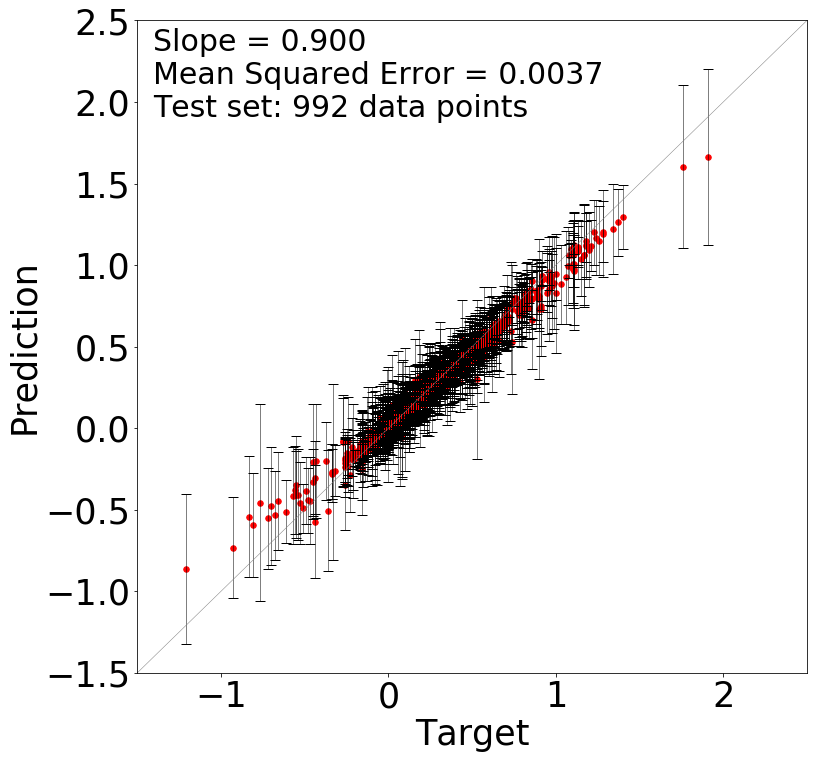

In [34]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.900', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()